# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Rishitha Patel

ID:1001863136

Team Mate Name:Angad Terikere Manjunatha

ID:1001718335

Team Mate name: Karthik Natarajan

ID:1001872904

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [5]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [6]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a
adult_data_set = pd.read_csv('CC GENERAL.csv')
print(adult_data_set.describe()) #out of 18 feature columns 17 colums are numeric


FileNotFoundError: [Errno 2] No such file or directory: 'ccgeneral.csv'

In [ ]:
#Finding the missing values in the dataset
adult_data_set['PURCHASES'] = adult_data_set['PURCHASES'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
adult_data_set['CASH_ADVANCE'] = adult_data_set['CASH_ADVANCE'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
adult_data_set['INSTALLMENTS_PURCHASES'] = adult_data_set['INSTALLMENTS_PURCHASES'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
print(adult_data_set.isna().sum()) #get the total number of missing values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
adult_data_set[adult_data_set.isnull().any(axis=1)] #columns with null values

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [ ]:
adult_data_set["PURCHASES"].value_counts()

0.00       2044
45.65        27
150.00       16
60.00        16
200.00       13
           ... 
878.64        1
578.66        1
537.36        1
2253.98       1
423.23        1
Name: PURCHASES, Length: 6203, dtype: int64

In [ ]:
adult_data_set["CASH_ADVANCE"].value_counts()

0.000000        4628
808.489505         1
2684.507978        1
9894.067335        1
5409.095889        1
                ... 
185.647722         1
79.010936          1
10762.707760       1
3053.777459        1
4440.766432        1
Name: CASH_ADVANCE, Length: 4323, dtype: int64

In [ ]:
adult_data_set["INSTALLMENTS_PURCHASES"].value_counts()

0.00       3916
300.00       14
100.00       14
200.00       14
150.00       12
           ... 
421.96        1
124.00        1
640.00        1
1061.72       1
1174.00       1
Name: INSTALLMENTS_PURCHASES, Length: 4452, dtype: int64

In [ ]:
#Filling the missing values with highest repeated value in the respective column
adult_data_set = adult_data_set.fillna({"PURCHASES": "0"}) #since Private is repeated more in the WorkClass
adult_data_set = adult_data_set.fillna({"CASH_ADVANCE": "0"})
adult_data_set = adult_data_set.fillna({"INSTALLMENTS_PURCHASES": "0"})

In [ ]:
adult_data_set[adult_data_set.isnull().any(axis=1)] 
#We have handeled all the missing values in the given data set

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [ ]:
#Lets convert the string values to numeric
adult_data_set["CUST_ID"] = adult_data_set["CUST_ID"].astype('category')
adult_data_set["BALANCE"] = adult_data_set["BALANCE"].astype('category')
adult_data_set["BALANCE_FREQUENCY"]  = adult_data_set["BALANCE_FREQUENCY"].astype('category')
adult_data_set["PURCHASES"] = adult_data_set["PURCHASES"].astype('category')
adult_data_set["ONEOFF_PURCHASES"] = adult_data_set["ONEOFF_PURCHASES"].astype('category')
adult_data_set["INSTALLMENTS_PURCHASES"] = adult_data_set["INSTALLMENTS_PURCHASES"].astype('category')
adult_data_set["CASH_ADVANCE"] = adult_data_set["CASH_ADVANCE"].astype('category')
adult_data_set["PURCHASES_FREQUENCY"] = adult_data_set["PURCHASES_FREQUENCY"].astype('category')
adult_data_set["ONEOFF_PURCHASES_FREQUENCY"] = adult_data_set["ONEOFF_PURCHASES_FREQUENCY"].astype('category')
adult_data_set["PURCHASES_INSTALLMENTS_FREQUENCY"] = adult_data_set["PURCHASES_INSTALLMENTS_FREQUENCY"].astype('category')
adult_data_set["CASH_ADVANCE_FREQUENCY"] = adult_data_set["CASH_ADVANCE_FREQUENCY"].astype('category')
adult_data_set["CASH_ADVANCE_TRX"] = adult_data_set["CASH_ADVANCE_TRX"].astype('category')
adult_data_set["PURCHASES_TRX"] = adult_data_set["PURCHASES_TRX"].astype('category')
adult_data_set["CREDIT_LIMIT"] = adult_data_set["CREDIT_LIMIT"].astype('category')
adult_data_set["PAYMENTS"] = adult_data_set["PAYMENTS"].astype('category')
adult_data_set["MINIMUM_PAYMENTS"] = adult_data_set["MINIMUM_PAYMENTS"].astype('category')
adult_data_set["PRC_FULL_PAYMENT"] = adult_data_set["PRC_FULL_PAYMENT"].astype('category')
adult_data_set["TENURE"] = adult_data_set["TENURE"].astype('category')
print(adult_data_set.dtypes)

CUST_ID                             category
BALANCE                             category
BALANCE_FREQUENCY                   category
PURCHASES                           category
ONEOFF_PURCHASES                    category
INSTALLMENTS_PURCHASES              category
CASH_ADVANCE                        category
PURCHASES_FREQUENCY                 category
ONEOFF_PURCHASES_FREQUENCY          category
PURCHASES_INSTALLMENTS_FREQUENCY    category
CASH_ADVANCE_FREQUENCY              category
CASH_ADVANCE_TRX                    category
PURCHASES_TRX                       category
CREDIT_LIMIT                        category
PAYMENTS                            category
MINIMUM_PAYMENTS                    category
PRC_FULL_PAYMENT                    category
TENURE                              category
dtype: object


In [ ]:
adult_data_set["CUST_ID_cat"] = adult_data_set["CUST_ID"].cat.codes
adult_data_set["BALANCE_cat"] = adult_data_set["BALANCE"].cat.codes
adult_data_set["BALANCE_FREQUENCY_cat"] = adult_data_set["BALANCE_FREQUENCY"].cat.codes
adult_data_set["PURCHASES_cat"] = adult_data_set["PURCHASES"].cat.codes
adult_data_set["ONEOFF_PURCHASES_cat"] = adult_data_set["ONEOFF_PURCHASES"].cat.codes
adult_data_set["INSTALLMENTS_PURCHASES_cat"] = adult_data_set["INSTALLMENTS_PURCHASES"].cat.codes
adult_data_set["CASH_ADVANCE"] = adult_data_set["CASH_ADVANCE"].cat.codes
adult_data_set["PURCHASES_FREQUENCY_cat"] = adult_data_set["PURCHASES_FREQUENCY"].cat.codes
adult_data_set["ONEOFF_PURCHASES_FREQUENCY_cat"] = adult_data_set["ONEOFF_PURCHASES_FREQUENCY"].cat.codes
adult_data_set["PURCHASES_INSTALLMENTS_FREQUENCY_cat"] = adult_data_set["PURCHASES_INSTALLMENTS_FREQUENCY"].cat.codes
adult_data_set["CASH_ADVANCE_FREQUENCY_cat"] = adult_data_set["PURCHASES_INSTALLMENTS_FREQUENCY"].cat.codes
adult_data_set["CASH_ADVANCE_TRX_cat"] = adult_data_set["CASH_ADVANCE_TRX"].cat.codes
adult_data_set["PURCHASES_TRX_cat"] = adult_data_set["PURCHASES_TRX"].cat.codes
adult_data_set["CREDIT_LIMIT_cat"] = adult_data_set["CREDIT_LIMIT"].cat.codes
adult_data_set["PAYMENTS_cat"] = adult_data_set["PAYMENTS"].cat.codes
adult_data_set["MINIMUM_PAYMENTS_cat"] = adult_data_set["MINIMUM_PAYMENTS"].cat.codes
adult_data_set["PRC_FULL_PAYMENT_cat"] = adult_data_set["PRC_FULL_PAYMENT"].cat.codes
adult_data_set["TENURE_cat"] = adult_data_set["TENURE"].cat.codes

adult_data_set.drop(['CUST_ID','BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'], axis=1)

CUST_ID_cat  BALANCE_cat  BALANCE_FREQUENCY_cat  PURCHASES_cat  \
0               0         1189                     35            521   
1               1         7535                     41              0   
2               2         7019                     42           3295   
3               3         6133                     27           4529   
4               4         4259                     42             40   
...           ...          ...                    ...            ...   
8945         8945          940                     42           1606   
8946         8946          689                     42           1650   
8947         8947          812                     36            797   
8948         8948          512                     36              0   
8949         8949         3211                     28           3967   

      ONEOFF_PURCHASES_cat  INSTALLMENTS_PURCHASES_cat  \
0                        0                         515   
1                        0                           0   
2                     2173                           0   
3                     3046                           0   
4                       29                           0   
...                    ...                         ...   
8945                     0                        1603   
8946                     0                        1644   
8947                     0                         816   
8948                     0                           0   
8949                  2659                           0   

      PURCHASES_FREQUENCY_cat  ONEOFF_PURCHASES_FREQUENCY_cat  \
0                           7                               0   
1                           0                               0   
2                          46                              46   
3                           1                               1   
4                           1                               1   
...                       ...                             ...   
8945                       46                               0   
8946                       46                               0   
8947                       39                               0   
8948                        0                               0   
8949                       31                              31   

      PURCHASES_INSTALLMENTS_FREQUENCY_cat  CASH_ADVANCE_FREQUENCY_cat  \
0                                        1                           1   
1                                        0                           0   
2                                        0                           0   
3                                        0                           0   
4                                        0                           0   
...                                    ...                         ...   
8945                                    39                          39   
8946                                    39                          39   
8947                                    31                          31   
8948                                     0                           0   
8949                                     0                           0   

      CASH_ADVANCE_TRX_cat  PURCHASES_TRX_cat  CREDIT_LIMIT_cat  PAYMENTS_cat  \
0                        0                  2                13           812   
1                        4                  0               123          7879   
2                        0                 12               130          3328   
3                        1                  1               130             0   
4                        0                  1                18          3570   
...                    ...                ...               ...           ...   
8945                     0                  6                13          1630   
8946                     0                  6                13          1261   
8947                     0                  5

In [ ]:
adult_data_set = adult_data_set[['CUST_ID_cat','BALANCE_cat','BALANCE_FREQUENCY_cat','PURCHASES_cat','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES_cat','CASH_ADVANCE','PURCHASES_FREQUENCY_cat','ONEOFF_PURCHASES_FREQUENCY_cat','PURCHASES_INSTALLMENTS_FREQUENCY_cat','CASH_ADVANCE_FREQUENCY_cat','CASH_ADVANCE_FREQUENCY_cat','PURCHASES_TRX_cat','CREDIT_LIMIT_cat','PAYMENTS_cat','MINIMUM_PAYMENTS_cat','PRC_FULL_PAYMENT_cat','TENURE_cat']]
print(adult_data_set)

      CUST_ID_cat  BALANCE_cat  BALANCE_FREQUENCY_cat  PURCHASES_cat  \
0               0         1189                     35            521   
1               1         7535                     41              0   
2               2         7019                     42           3295   
3               3         6133                     27           4529   
4               4         4259                     42             40   
...           ...          ...                    ...            ...   
8945         8945          940                     42           1606   
8946         8946          689                     42           1650   
8947         8947          812                     36            797   
8948         8948          512                     36              0   
8949         8949         3211                     28           3967   

     ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES_cat  CASH_ADVANCE  \
0                0.00                         515             0   
1

In [ ]:
print("As asked in the question: Taking the whole given dataset for performing elbow method")

mms = MinMaxScaler()
mms.fit(adult_data_set.iloc[:,0:15])
data_transformed = mms.transform(adult_data_set.iloc[:,0:15])

Sum_of_squared = []
K = range(1,11)
for k in K:
    kmeansmodel = KMeans(n_clusters=k)
    kmeansmodel = kmeansmodel.fit(data_transformed)
    Sum_of_squared.append(kmeansmodel.inertia_)
    
plt.plot(K, Sum_of_squared, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared')
plt.title('Elbow Method For Finding Optimal k for Whole Data set')
plt.show()
print(Sum_of_squared[2]);
print("For this data set k = 2(clusters) is Optimal value using Elbow Method");

As asked in the question: Taking the whole given dataset for performing elbow method


6295.343942732339
For this data set k = 2(clusters) is Optimal value using Elbow Method


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [ ]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
data_columns = ["BALANCE_FREQUENCY_cat","PURCHASES_cat","CASH_ADVANCE"]
for k in data_columns:
    x = adult_data_set[k].values
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
    adult_data_set[k] = pd.DataFrame(x_scaled)
columns=['CUST_ID_cat','BALANCE_cat','BALANCE_FREQUENCY_cat','PURCHASES_cat','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES_cat','CASH_ADVANCE','PURCHASES_FREQUENCY_cat','ONEOFF_PURCHASES_FREQUENCY_cat','PURCHASES_INSTALLMENTS_FREQUENCY_cat','CASH_ADVANCE_FREQUENCY_cat','CASH_ADVANCE_FREQUENCY_cat','PURCHASES_TRX_cat','CREDIT_LIMIT_cat','PAYMENTS_cat','MINIMUM_PAYMENTS_cat','PRC_FULL_PAYMENT_cat','TENURE_cat']
#columns = ['Age','WorkClass_cat','Fnlwght','Education_cat','EducationNumber','MaritalStatus_cat','Occupation_cat','Relationship_cat','Race_cat','Sex_cat','CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry_cat']
X = adult_data_set[columns]
Y = adult_data_set.TENURE_cat

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test
print(X_train)

###################end code for Task 1-b-1

      CUST_ID_cat  BALANCE_cat  BALANCE_FREQUENCY_cat  PURCHASES_cat  \
7562         7562         3144               1.000000       0.000000   
2942         2942         4888               1.000000       0.000000   
666           666         5701               1.000000       0.313286   
2407         2407         3834               1.000000       0.529345   
1002         1002         1705               0.738095       0.054660   
...           ...          ...                    ...            ...   
2895         2895          460               0.166667       0.089487   
7813         7813         6392               1.000000       0.742341   
905           905         1742               1.000000       0.506127   
5192         5192         2069               0.071429       0.000000   
235           235         7871               1.000000       0.664624   

     ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES_cat  CASH_ADVANCE  \
7562             0.00                           0      0.131421   
2

[0 0 1 ... 0 0 0]
[[5.23068029e+03 2.27838860e+03 7.77615595e-01 3.27515876e-01
  2.98566955e+02 1.12018062e+03 1.05477731e-01 2.29759394e+01
  7.08108108e+00 1.73197100e+01 1.73197100e+01 1.73197100e+01
  1.73197100e+01 1.73197100e+01 1.01839156e+01 5.74040870e+01
  2.90857053e+03 1.99875049e+03 1.10468029e+01 5.32465392e+00]
 [3.74028350e+03 6.38807273e+03 9.73515497e-01 3.98034360e-01
  8.37099712e+02 1.27413154e+03 3.75822790e-01 2.16889508e+01
  1.07294955e+01 1.61086351e+01 1.61086351e+01 1.61086351e+01
  1.61086351e+01 1.61086351e+01 1.81098731e+01 8.78502012e+01
  5.50938347e+03 6.20708233e+03 2.59733829e+00 5.69792634e+00]]


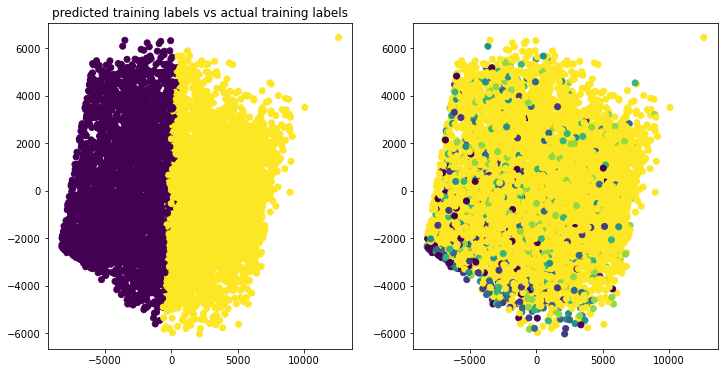

In [ ]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans_model = KMeans(n_clusters=2, random_state=2).fit(X_train)
labels = kmeans_model.predict(X_train)
print(labels)
centroids = kmeans_model.cluster_centers_
print(centroids)

# Compute cluster centers and predict cluster index for each sample 
f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

# Model and fit the data to the PCA model
X_train_pca = PCA(2)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
plot_columns = X_train_pca.fit_transform(X_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.title('predicted training labels vs actual training labels')
#plt.show()

plt.subplot(1,2,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_train)
#plt.show()

###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

In [ ]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
test_labels = kmeans_model.predict(X_test)
centroids = kmeans_model.cluster_centers_
print(centroids)

# Model and fit the data to the PCA model
X_test_pca = PCA(2)

f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
plot_columns = X_test_pca.fit_transform(X_test)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=test_labels)
plt.title('predicted testing labels vs actual testing labels')

plt.subplot(1,2,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_test)

###################end code for Task 1-b-3

[[5.23068029e+03 2.27838860e+03 7.77615595e-01 3.27515876e-01
  2.98566955e+02 1.12018062e+03 1.05477731e-01 2.29759394e+01
  7.08108108e+00 1.73197100e+01 1.73197100e+01 1.73197100e+01
  1.73197100e+01 1.73197100e+01 1.01839156e+01 5.74040870e+01
  2.90857053e+03 1.99875049e+03 1.10468029e+01 5.32465392e+00]
 [3.74028350e+03 6.38807273e+03 9.73515497e-01 3.98034360e-01
  8.37099712e+02 1.27413154e+03 3.75822790e-01 2.16889508e+01
  1.07294955e+01 1.61086351e+01 1.61086351e+01 1.61086351e+01
  1.61086351e+01 1.61086351e+01 1.81098731e+01 8.78502012e+01
  5.50938347e+03 6.20708233e+03 2.59733829e+00 5.69792634e+00]]


In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [ ]:
###################begin code for Task 1-b-4: Print out a confusion matrix
print (confusion_matrix(Y_train,labels))
print (confusion_matrix(Y_test,test_labels))

###################end code for Task 1-b-4

[[ 112   32    0    0    0    0    0]
 [  91   41    0    0    0    0    0]
 [ 100   39    0    0    0    0    0]
 [  74   49    0    0    0    0    0]
 [  92   71    0    0    0    0    0]
 [ 116  134    0    0    0    0    0]
 [2447 2867    0    0    0    0    0]]
[[  48   12    0    0    0    0    0]
 [  43   15    0    0    0    0    0]
 [  35   22    0    0    0    0    0]
 [  39   13    0    0    0    0    0]
 [  48   25    0    0    0    0    0]
 [  49   66    0    0    0    0    0]
 [1053 1217    0    0    0    0    0]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [ ]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)
print(pdm_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
hc_cc = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='complete')
y_hc_cc=hc_cc.fit_predict(X_train)
print(y_hc_cc)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
hc_ec = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
y_hc_ec=hc_ec.fit_predict(X_train)
print(y_hc_ec)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
hc_mc = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='complete')
y_hc_mc=hc_mc.fit_predict(X_train)
print(y_hc_mc)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
hc_ca = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='average')
y_hc_ca=hc_ca.fit_predict(X_train)
print(y_hc_ca)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
hc_ea = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
y_hc_ea=hc_ea.fit_predict(X_train)
print(y_hc_ea)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
hc_ma = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='average' )
y_hc_ma=hc_ma.fit_predict(X_train)
print(y_hc_ma)


print("F1-score for complete linkage + cosine:", f1_score(Y_train, y_hc_cc,average='micro'))
print("F1-score for complete linkage + euclidean:", f1_score(Y_train, y_hc_ec,average='micro'))
print("F1-score for complete linkage + manhattan:", f1_score(Y_train, y_hc_mc,average='micro'))
print("F1-score for average linkage + cosine:", f1_score(Y_train, y_hc_ca,average='micro'))
print("F1-score for average linkage + euclidean:", f1_score(Y_train, y_hc_ea,average='micro'))
print("F1-score for average linkage + manhattan:", f1_score(Y_train, y_hc_ma,average='micro'))
###################end code for Task 2-a

[[    0.          5335.43484646  9641.40700912 ...  7515.2152562
   4057.78463215  9335.75274359]
 [ 5335.43484646     0.          5785.50949431 ...  5822.45063014
   5688.63965728  6083.52712518]
 [ 9641.40700912  5785.50949431     0.         ... 10036.39911078
  10870.89901388  9530.06411069]
 ...
 [ 7515.2152562   5822.45063014 10036.39911078 ...     0.
   4357.10094003  6184.86904562]
 [ 4057.78463215  5688.63965728 10870.89901388 ...  4357.10094003
      0.          7724.04023449]
 [ 9335.75274359  6083.52712518  9530.06411069 ...  6184.86904562
   7724.04023449     0.        ]]
[1 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
F1-score for complete linkage + cosine: 0.020750199521149242
F1-score for complete linkage + euclidean: 0.022984836392657627
F1-score for complete linkage + manhattan: 0.022984836392657627
F1-score for average linkage + cosine: 0.022984836392657627
F1-score for average linkage + euclidean: 0.02106943

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

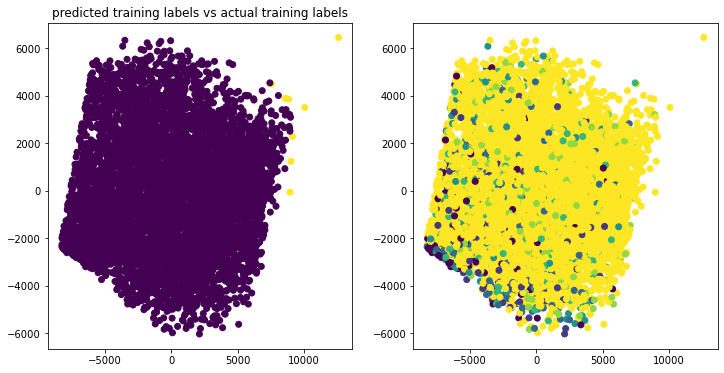

In [ ]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 
# Model and fit the data to the PCA model
X_train_pca = PCA(2)

f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

plot_columns = X_train_pca.fit_transform(X_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=y_hc_mc)
plt.title('predicted training labels vs actual training labels')
#plt.show()

plt.subplot(1,2,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=Y_train)
#plt.show()



###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

[1 1 1 ... 0 0 0]
[[    0.          6367.81743784  5905.02752548 ...  8960.20490851
   8988.34595506  9253.94574808]
 [ 6367.81743784     0.           931.92007486 ... 11221.05302211
  11374.75397017  9998.61754383]
 [ 5905.02752548   931.92007486     0.         ... 10946.33765382
  11090.06353236  9729.6063301 ]
 ...
 [ 8960.20490851 11221.05302211 10946.33765382 ...     0.
    871.9719128   2760.52782443]
 [ 8988.34595506 11374.75397017 11090.06353236 ...   871.9719128
      0.          2912.45480905]
 [ 9253.94574808  9998.61754383  9729.6063301  ...  2760.52782443
   2912.45480905     0.        ]]
F1-score for complete linkage + cosine: 0.019329608938547484
F1-score for complete linkage + euclidean: 0.021229050279329607
F1-score for complete linkage + manhattan: 0.022793296089385476
F1-score for average linkage + cosine: 0.021899441340782123
F1-score for average linkage + euclidean: 0.021229050279329607
F1-score for average linkage + manhattan: 0.021229050279329607


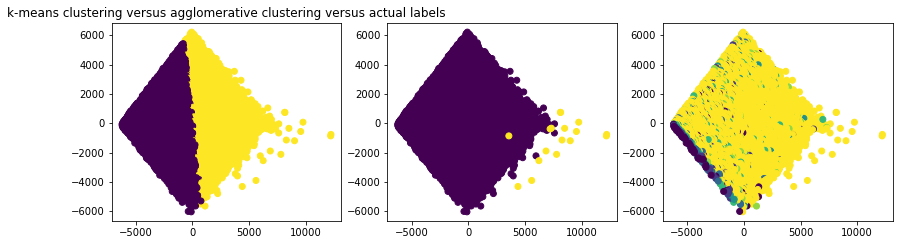

In [ ]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans_model_labels = KMeans(n_clusters=2, random_state=2).fit_predict(adult_data_set.iloc[:,0:14])
print(kmeans_model_labels)


### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm = pairwise_distances(adult_data_set.iloc[:,0:14])
print(pdm)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
hc_cc = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='complete').fit_predict(adult_data_set.iloc[:,0:14])

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
hc_ec = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete').fit_predict(adult_data_set.iloc[:,0:14])


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
hc_mc = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='complete').fit_predict(adult_data_set.iloc[:,0:14])


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
hc_ca = AgglomerativeClustering(n_clusters = 2, affinity = 'cosine', linkage ='average').fit_predict(adult_data_set.iloc[:,0:14])


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
hc_ea = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average').fit_predict(adult_data_set.iloc[:,0:14])


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
hc_ma = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', linkage ='average').fit_predict(adult_data_set.iloc[:,0:14])


print("F1-score for complete linkage + cosine:", f1_score(adult_data_set['TENURE_cat'], hc_cc,average='micro'))
print("F1-score for complete linkage + euclidean:", f1_score(adult_data_set['TENURE_cat'], hc_ec,average='micro'))
print("F1-score for complete linkage + manhattan:", f1_score(adult_data_set['TENURE_cat'], hc_mc,average='micro'))
print("F1-score for average linkage + cosine:", f1_score(adult_data_set['TENURE_cat'], hc_ca,average='micro'))
print("F1-score for average linkage + euclidean:", f1_score(adult_data_set['TENURE_cat'], hc_ea,average='micro'))
print("F1-score for average linkage + manhattan:", f1_score(adult_data_set['TENURE_cat'], hc_ma,average='micro'))



### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = None
X_pca = PCA(2)

f, axs = plt.subplots(figsize=(14,8))
plot_columns = X_pca.fit_transform(adult_data_set.iloc[:,0:14])
plt.subplot(2,3,1)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=kmeans_model_labels)
plt.title('k-means clustering versus agglomerative clustering versus actual labels')
#plt.show()

plt.subplot(2,3,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=hc_mc)
#plt.show()

plt.subplot(2,3,3)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=adult_data_set.TENURE_cat)
#plt.show()

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [ ]:
###################begin code for Task 3-b
print (confusion_matrix(adult_data_set['TENURE_cat'],kmeans_model_labels))
print (confusion_matrix(adult_data_set['TENURE_cat'],hc_mc))
print("--------------------------------------------------------------------------------")
print(classification_report(adult_data_set['TENURE_cat'],kmeans_model_labels))
print(classification_report(adult_data_set['TENURE_cat'],hc_mc))

print("The accuracy of the model is good when the data is trained with Agglomerative Clustering compared to K-Means Clustering ")

###################end code for Task 3-b

[[ 152   52    0    0    0    0    0]
 [ 135   55    0    0    0    0    0]
 [ 135   61    0    0    0    0    0]
 [ 119   56    0    0    0    0    0]
 [ 139   97    0    0    0    0    0]
 [ 193  172    0    0    0    0    0]
 [3496 4088    0    0    0    0    0]]
[[ 204    0    0    0    0    0    0]
 [ 190    0    0    0    0    0    0]
 [ 196    0    0    0    0    0    0]
 [ 175    0    0    0    0    0    0]
 [ 236    0    0    0    0    0    0]
 [ 365    0    0    0    0    0    0]
 [7567   17    0    0    0    0    0]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.03      0.75      0.07       204
           1       0.01      0.29      0.02       190
           2       0.00      0.00      0.00       196
           3       0.00      0.00      0.00       175
           4       0.00      0.00      0.00       236
           5       0.00      0.00      0.00       365
      

C:\Users\Rishitha eddy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rishitha eddy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rishitha eddy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rishitha eddy\anaconda

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points